In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout,BatchNormalization 
from keras.preprocessing.image import ImageDataGenerator
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import pandas as pd

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

#import splitfolders
import os
import cv2
import numpy as np
import random

In [ ]:
%tensorflow_version 2.x
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
labels = ['0', '1','2','3','4','5']
img_size = 128
def get_data(data_dir):
    data = []
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
!unzip '/content/drive/MyDrive/Training/covid infection percent 499/Train-20211227T124202Z-001.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Train/Classified_Images/5/Image_0329.png  
  inflating: Train/Classified_Images/5/Image_0280.png  
  inflating: Train/Classified_Images/5/Image_0295.png  
  inflating: Train/Classified_Images/3/Image_1983.png  
  inflating: Train/Classified_Images/5/Image_0294.png  
  inflating: Train/Classified_Images/5/Image_0293.png  
  inflating: Train/Classified_Images/5/Image_0288.png  
  inflating: Train/Classified_Images/5/Image_0330.png  
  inflating: Train/Classified_Images/5/Image_0444.png  
  inflating: Train/Classified_Images/5/Image_0443.png  
  inflating: Train/Classified_Images/5/Image_0439.png  
  inflating: Train/Classified_Images/5/Image_0292.png  
  inflating: Train/Classified_Images/5/Image_0337.png  
  inflating: Train/Classified_Images/5/Image_0331.png  
  inflating: Train/Classified_Images/5/Image_0433.png  
  inflating: Train/Classified_Images/5/Image_0283.png  
  inflating: Train/Train/Image_2875.png  
  inflating

In [ ]:
import os

In [ ]:
len(os.listdir('/content/Train/Classified_Images/0')), \
len(os.listdir('/content/Train/Classified_Images/1')),\
len(os.listdir('/content/Train/Classified_Images/2')),\
len(os.listdir('/content/Train/Classified_Images/3')),\
len(os.listdir('/content/Train/Classified_Images/4')),\
len(os.listdir('/content/Train/Classified_Images/5'))

(735, 1164, 431, 338, 201, 184)

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio('/content/drive/MyDrive/Training/covid infection percent 499/Dataset1', output="splitted_data", seed=1337, ratio=(.8, 0.1,0.1)) 

Copying files: 3053 files [00:52, 58.63 files/s] 


In [ ]:
!zip -r '/content/splitted_data.zip' '/content/splitted_data'

!cp '/content/splitted_data.zip' -d '/content/drive/MyDrive/Training/covid infection percent 499'

  adding: content/splitted_data/ (stored 0%)
  adding: content/splitted_data/train/ (stored 0%)
  adding: content/splitted_data/train/1/ (stored 0%)
  adding: content/splitted_data/train/1/Image_0662.png (deflated 2%)
  adding: content/splitted_data/train/1/Image_1539.png (deflated 3%)
  adding: content/splitted_data/train/1/Image_0803.png (deflated 2%)
  adding: content/splitted_data/train/1/Image_0354.png (deflated 3%)
  adding: content/splitted_data/train/1/Image_1776.png (deflated 4%)
  adding: content/splitted_data/train/1/Image_2571.png (deflated 4%)
  adding: content/splitted_data/train/1/Image_0506.png (deflated 3%)
  adding: content/splitted_data/train/1/Image_1365.png (deflated 3%)
  adding: content/splitted_data/train/1/Image_1238.png (deflated 3%)
  adding: content/splitted_data/train/1/Image_1781.png (deflated 3%)
  adding: content/splitted_data/train/1/Image_0417.png (deflated 2%)
  adding: content/splitted_data/train/1/Image_1769.png (deflated 3%)
  adding: content/split

In [ ]:
!cp '/content/drive/MyDrive/Training/covid infection percent 499/splitted_data.zip' -d '/content'
!unzip '/content/splitted_data.zip'

Archive:  /content/splitted_data.zip
   creating: content/splitted_data/
   creating: content/splitted_data/train/
   creating: content/splitted_data/train/1/
  inflating: content/splitted_data/train/1/Image_0662.png  
  inflating: content/splitted_data/train/1/Image_1539.png  
  inflating: content/splitted_data/train/1/Image_0803.png  
  inflating: content/splitted_data/train/1/Image_0354.png  
  inflating: content/splitted_data/train/1/Image_1776.png  
  inflating: content/splitted_data/train/1/Image_2571.png  
  inflating: content/splitted_data/train/1/Image_0506.png  
  inflating: content/splitted_data/train/1/Image_1365.png  
  inflating: content/splitted_data/train/1/Image_1238.png  
  inflating: content/splitted_data/train/1/Image_1781.png  
  inflating: content/splitted_data/train/1/Image_0417.png  
  inflating: content/splitted_data/train/1/Image_1769.png  
  inflating: content/splitted_data/train/1/Image_1767.png  
  inflating: content/splitted_data/train/1/Image_0382.png  
 

In [ ]:
!pip install scikit-plot

In [ ]:
train = get_data('/content/splitted_data/train')
#test = get_data('/content/drive/MyDrive/Colab Notebooks/splited_Train_Test/test')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app


In [ ]:
#X=np.asarray(train)
#Y=np.asarray(val)
train.shape

(2440, 2)

Text(0.5, 1.0, '0')

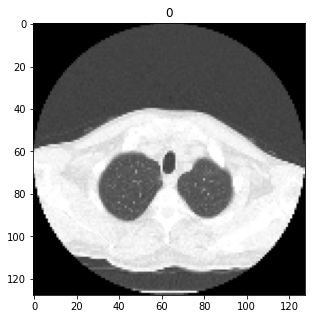

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, '5')

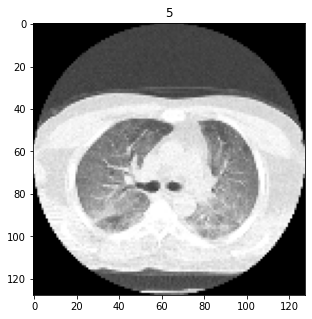

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [ ]:

x_train = []
y_train = []
#x_test = []
#y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

#for feature, label in test:
 #   x_test.append(feature)
  #  y_test.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
#x_test = np.array(x_test) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

#x_test.reshape(-1, img_size, img_size, 1)
#y_test = np.array(y_test)

In [ ]:
#x_train.shape
#x_train.shape
y_train.shape

(2440,)

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.3, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,
        fill_mode='nearest',  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
def get_model():

  model = Sequential()
  model.add(Conv2D(64,3,padding="same", activation="relu", input_shape=(128,128,3)))
  model.add(MaxPool2D())

  model.add(Conv2D(64, 3, padding="same", activation="relu"))
  model.add(MaxPool2D())
  model.add(Dropout(0.2))

  #model.add(Conv2D(64, 3, padding="same", activation="relu"))
  #model.add(BatchNormalization())
  #model.add(MaxPool2D())

  model.add(Conv2D(128, 3, padding="same", activation="relu"))
  model.add(BatchNormalization())
  model.add(MaxPool2D())

  model.add(Conv2D(128, 3, padding="same", activation="relu"))
  model.add(MaxPool2D())
  model.add(Dropout(0.2))


  model.add(Flatten())
  model.add(Dense(128,activation="relu"))
  model.add(Dense(64, activation="relu"))
  model.add(Dense(6, activation="softmax"))

  return model

model=get_model()

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 32, 32, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 128)      

In [ ]:
# Merge inputs and targets
#inputs = np.concatenate((x_train, x_val), axis=0)
#targets = np.concatenate((y_train, y_val), axis=0)

# Define the K-fold Cross Validator
#kfold = KFold(n_splits=10, shuffle=True)

#skf = StratifiedKFold(n_splits=3, shuffle=True)
#skf.get_n_splits(X, Y)
#K.clear_session()
#cuda.select_device(0)
#cuda.close()
from keras import backend as K
import gc

In [ ]:
from sklearn.model_selection import KFold

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/100
39/39 [==============================] - 5s 114ms/step - loss: 1.6167 - accuracy: 0.3693 - val_loss: 1.7759 - val_accuracy: 0.3770
Epoch 2/100
39/39 [==============================] - 4s 105ms/step - loss: 1.5123 - accuracy: 0.4037 - val_loss: 1.7727 - val_accuracy: 0.3934
Epoch 3/100
39/39 [==============================] - 4s 104ms/step - loss: 1.4653 - accuracy: 0.4131 - val_loss: 1.7701 - val_accuracy: 0.4262
Epoch 4/100
39/39 [==============================] - 4s 104ms/step - loss: 1.3807 - accuracy: 0.4467 - val_loss: 1.7490 - val_accuracy: 0.4590
Epoch 5/100
39/39 [==============================] - 4s 104ms/step - loss: 1.3140 - accuracy: 0.4668 - val_loss: 1.6618 - val_accuracy: 0.4754
Epoch 6/100
39/39 [==============================] - 4s 104ms/step - loss: 1.2033 - accuracy: 0.5074 - val_loss: 1.5998 - val_accuracy: 0.5287
Epoch 7/100
39/39 [==========================

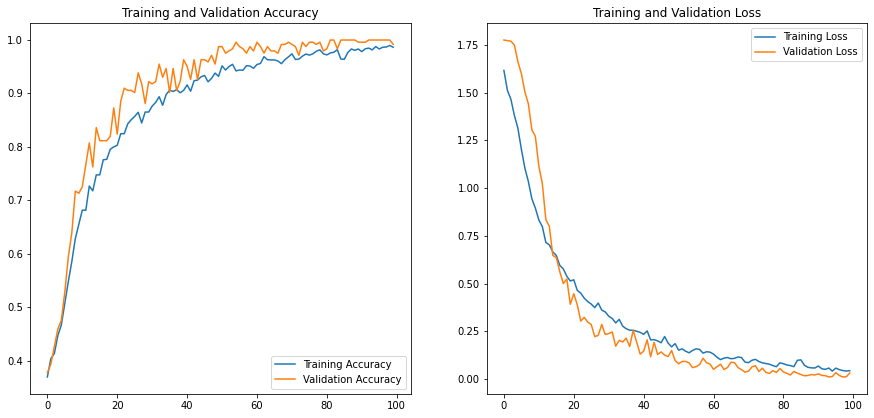

------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/100
39/39 [==============================] - 5s 113ms/step - loss: 0.0550 - accuracy: 0.9816 - val_loss: 0.0207 - val_accuracy: 0.9959
Epoch 2/100
39/39 [==============================] - 4s 105ms/step - loss: 0.0611 - accuracy: 0.9820 - val_loss: 0.0209 - val_accuracy: 1.0000
Epoch 3/100
39/39 [==============================] - 4s 104ms/step - loss: 0.0449 - accuracy: 0.9869 - val_loss: 0.0086 - val_accuracy: 1.0000
Epoch 4/100
39/39 [==============================] - 4s 104ms/step - loss: 0.0425 - accuracy: 0.9857 - val_loss: 0.0187 - val_accuracy: 0.9918
Epoch 5/100
39/39 [==============================] - 4s 105ms/step - loss: 0.0533 - accuracy: 0.9820 - val_loss: 0.0435 - val_accuracy: 0.9918
Epoch 6/100
39/39 [==============================] - 4s 104ms/step - loss: 0.0462 - accuracy: 0.9869 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 7/100
39/39 [==========================

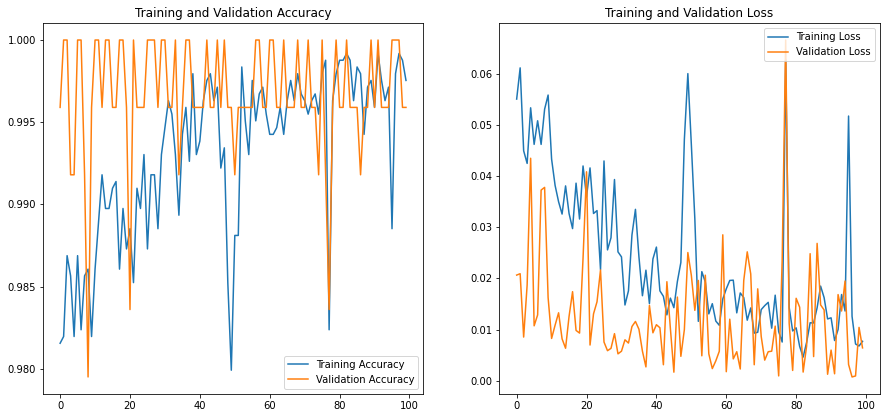

------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/100
39/39 [==============================] - 5s 113ms/step - loss: 0.0159 - accuracy: 0.9959 - val_loss: 8.0155e-04 - val_accuracy: 1.0000
Epoch 2/100
39/39 [==============================] - 4s 105ms/step - loss: 0.0098 - accuracy: 0.9963 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 3/100
39/39 [==============================] - 4s 104ms/step - loss: 0.0130 - accuracy: 0.9951 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 4/100
39/39 [==============================] - 4s 104ms/step - loss: 0.0195 - accuracy: 0.9963 - val_loss: 9.6433e-04 - val_accuracy: 1.0000
Epoch 5/100
39/39 [==============================] - 4s 104ms/step - loss: 0.0133 - accuracy: 0.9955 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 6/100
39/39 [==============================] - 4s 105ms/step - loss: 0.0120 - accuracy: 0.9971 - val_loss: 5.5741e-04 - val_accuracy: 1.0000
Epoch 7/100
39/39 [==============

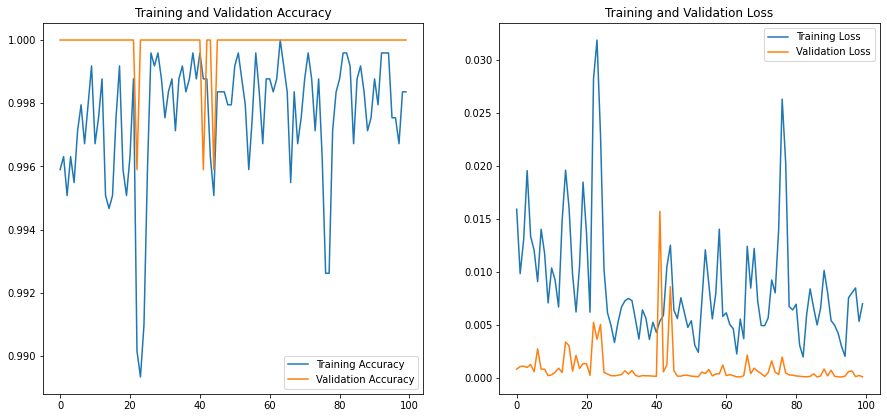

------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/100
39/39 [==============================] - 5s 112ms/step - loss: 0.0063 - accuracy: 0.9984 - val_loss: 2.2945e-04 - val_accuracy: 1.0000
Epoch 2/100
39/39 [==============================] - 4s 105ms/step - loss: 0.0099 - accuracy: 0.9963 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 3/100
39/39 [==============================] - 4s 105ms/step - loss: 0.0142 - accuracy: 0.9955 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 4/100
39/39 [==============================] - 4s 105ms/step - loss: 0.0094 - accuracy: 0.9975 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 5/100
39/39 [==============================] - 4s 105ms/step - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.0126 - val_accuracy: 0.9959
Epoch 6/100
39/39 [==============================] - 4s 105ms/step - loss: 0.0042 - accuracy: 0.9984 - val_loss: 0.0091 - val_accuracy: 0.9959
Epoch 7/100
39/39 [======================

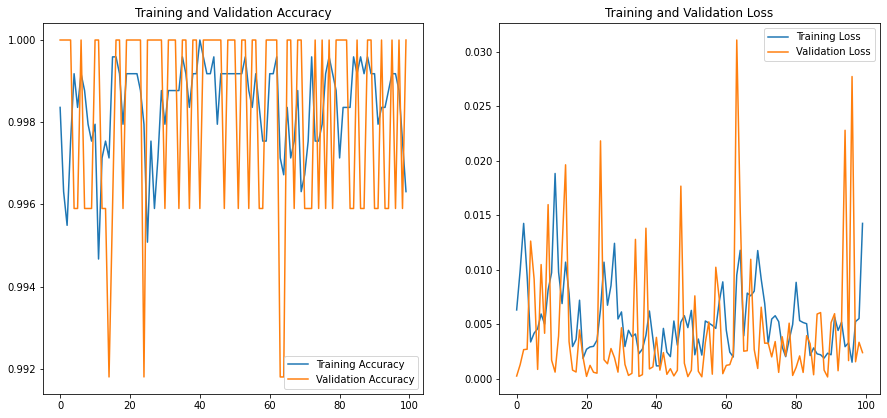

------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/100
39/39 [==============================] - 5s 113ms/step - loss: 0.0039 - accuracy: 0.9988 - val_loss: 1.6432e-04 - val_accuracy: 1.0000
Epoch 2/100
39/39 [==============================] - 4s 107ms/step - loss: 0.0041 - accuracy: 0.9988 - val_loss: 3.3574e-04 - val_accuracy: 1.0000
Epoch 3/100
39/39 [==============================] - 4s 106ms/step - loss: 0.0039 - accuracy: 0.9988 - val_loss: 2.4113e-05 - val_accuracy: 1.0000
Epoch 4/100
39/39 [==============================] - 4s 106ms/step - loss: 0.0017 - accuracy: 0.9992 - val_loss: 1.8787e-05 - val_accuracy: 1.0000
Epoch 5/100
39/39 [==============================] - 4s 106ms/step - loss: 0.0024 - accuracy: 0.9992 - val_loss: 1.4040e-04 - val_accuracy: 1.0000
Epoch 6/100
39/39 [==============================] - 4s 105ms/step - loss: 0.0078 - accuracy: 0.9971 - val_loss: 0.0044 - val_accuracy: 0.9959
Epoch 7/100
39/39 [======

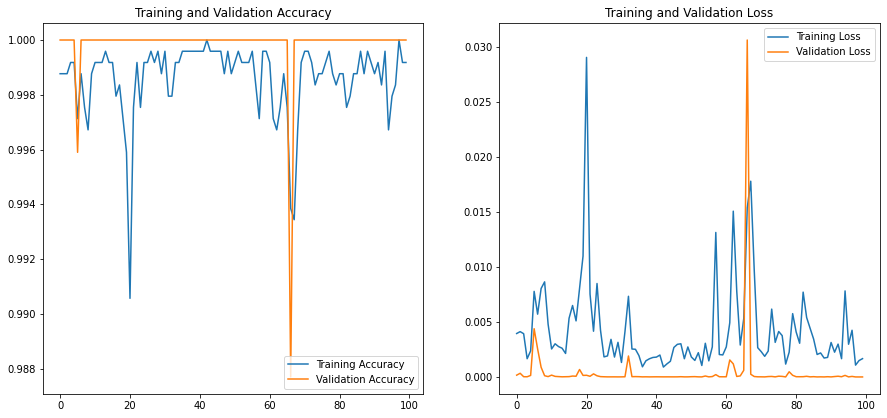

------------------------------------------------------------------------
Training for fold 6 ...
Epoch 1/100
39/39 [==============================] - 5s 113ms/step - loss: 0.0026 - accuracy: 0.9992 - val_loss: 1.5664e-05 - val_accuracy: 1.0000
Epoch 2/100
39/39 [==============================] - 4s 105ms/step - loss: 0.0031 - accuracy: 0.9992 - val_loss: 1.0386e-05 - val_accuracy: 1.0000
Epoch 3/100
39/39 [==============================] - 4s 106ms/step - loss: 0.0028 - accuracy: 0.9992 - val_loss: 1.4072e-04 - val_accuracy: 1.0000
Epoch 4/100
39/39 [==============================] - 4s 105ms/step - loss: 0.0040 - accuracy: 0.9988 - val_loss: 7.0029e-05 - val_accuracy: 1.0000
Epoch 5/100
39/39 [==============================] - 4s 105ms/step - loss: 0.0066 - accuracy: 0.9971 - val_loss: 1.0914e-04 - val_accuracy: 1.0000
Epoch 6/100
39/39 [==============================] - 4s 105ms/step - loss: 0.0035 - accuracy: 0.9992 - val_loss: 1.4277e-04 - val_accuracy: 1.0000
Epoch 7/100
39/39 [==

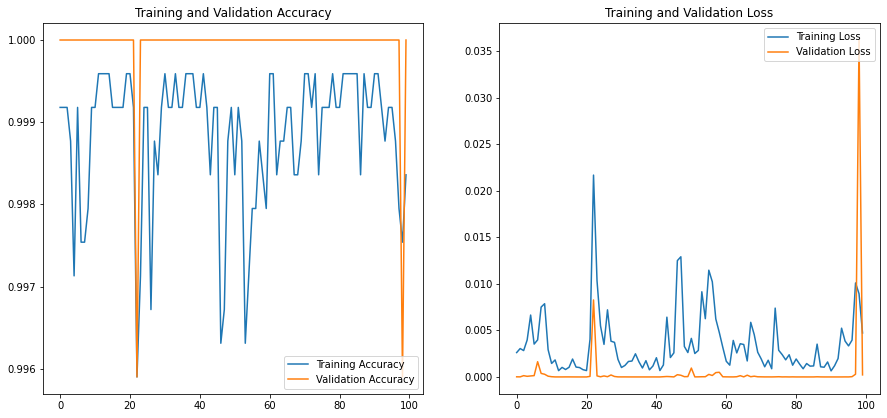

------------------------------------------------------------------------
Training for fold 7 ...
Epoch 1/100
39/39 [==============================] - 5s 114ms/step - loss: 0.0019 - accuracy: 0.9992 - val_loss: 7.5525e-06 - val_accuracy: 1.0000
Epoch 2/100
39/39 [==============================] - 4s 106ms/step - loss: 0.0025 - accuracy: 0.9992 - val_loss: 5.6709e-05 - val_accuracy: 1.0000
Epoch 3/100
39/39 [==============================] - 4s 106ms/step - loss: 9.2389e-04 - accuracy: 0.9992 - val_loss: 2.3338e-06 - val_accuracy: 1.0000
Epoch 4/100
39/39 [==============================] - 4s 107ms/step - loss: 0.0082 - accuracy: 0.9980 - val_loss: 6.5922e-05 - val_accuracy: 1.0000
Epoch 5/100
39/39 [==============================] - 4s 106ms/step - loss: 0.0154 - accuracy: 0.9951 - val_loss: 6.2819e-05 - val_accuracy: 1.0000
Epoch 6/100
39/39 [==============================] - 4s 105ms/step - loss: 0.0023 - accuracy: 0.9988 - val_loss: 1.8965e-04 - val_accuracy: 1.0000
Epoch 7/100
39/39

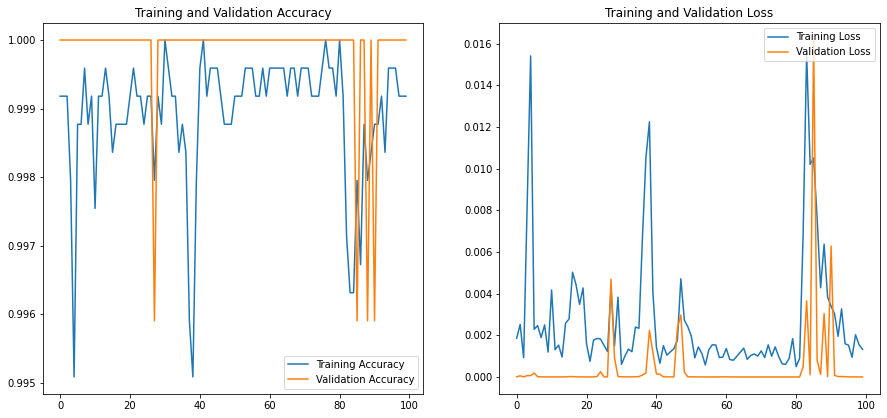

------------------------------------------------------------------------
Training for fold 8 ...
Epoch 1/100
39/39 [==============================] - 5s 115ms/step - loss: 0.0021 - accuracy: 0.9996 - val_loss: 1.1476e-06 - val_accuracy: 1.0000
Epoch 2/100
39/39 [==============================] - 4s 105ms/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 4.8799e-05 - val_accuracy: 1.0000
Epoch 3/100
39/39 [==============================] - 4s 105ms/step - loss: 0.0028 - accuracy: 0.9992 - val_loss: 1.8264e-05 - val_accuracy: 1.0000
Epoch 4/100
39/39 [==============================] - 4s 105ms/step - loss: 0.0028 - accuracy: 0.9988 - val_loss: 7.0235e-06 - val_accuracy: 1.0000
Epoch 5/100
39/39 [==============================] - 4s 106ms/step - loss: 0.0026 - accuracy: 0.9992 - val_loss: 9.1835e-06 - val_accuracy: 1.0000
Epoch 6/100
39/39 [==============================] - 4s 105ms/step - loss: 0.0029 - accuracy: 0.9984 - val_loss: 6.3040e-06 - val_accuracy: 1.0000
Epoch 7/100
39/39 [==

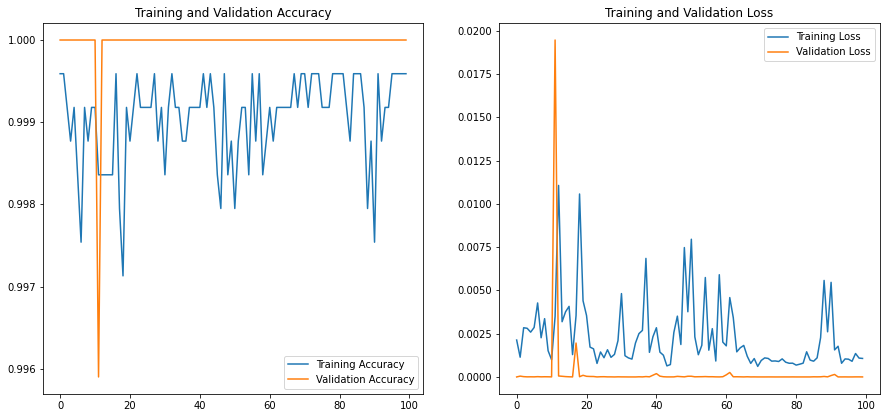

------------------------------------------------------------------------
Training for fold 9 ...
Epoch 1/100
39/39 [==============================] - 5s 111ms/step - loss: 0.0028 - accuracy: 0.9988 - val_loss: 9.1262e-07 - val_accuracy: 1.0000
Epoch 2/100
39/39 [==============================] - 4s 104ms/step - loss: 0.0013 - accuracy: 0.9992 - val_loss: 3.2517e-06 - val_accuracy: 1.0000
Epoch 3/100
39/39 [==============================] - 4s 106ms/step - loss: 9.2459e-04 - accuracy: 0.9992 - val_loss: 1.3191e-06 - val_accuracy: 1.0000
Epoch 4/100
39/39 [==============================] - 4s 106ms/step - loss: 8.0286e-04 - accuracy: 0.9996 - val_loss: 2.1372e-06 - val_accuracy: 1.0000
Epoch 5/100
39/39 [==============================] - 4s 104ms/step - loss: 0.0010 - accuracy: 0.9992 - val_loss: 1.3405e-06 - val_accuracy: 1.0000
Epoch 6/100
39/39 [==============================] - 4s 104ms/step - loss: 0.0010 - accuracy: 0.9992 - val_loss: 1.2336e-06 - val_accuracy: 1.0000
Epoch 7/100
3

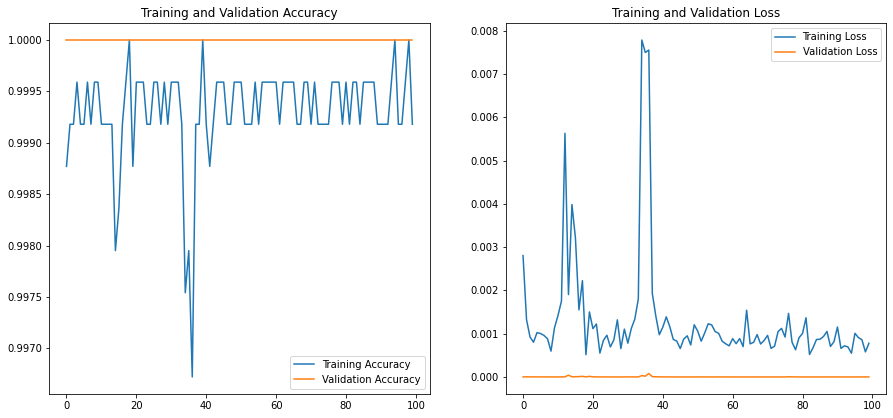

------------------------------------------------------------------------
Training for fold 10 ...
Epoch 1/100
39/39 [==============================] - 5s 115ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 9.1849e-08 - val_accuracy: 1.0000
Epoch 2/100
39/39 [==============================] - 4s 106ms/step - loss: 9.9888e-04 - accuracy: 0.9992 - val_loss: 1.0553e-07 - val_accuracy: 1.0000
Epoch 3/100
39/39 [==============================] - 4s 106ms/step - loss: 9.7320e-04 - accuracy: 0.9996 - val_loss: 3.1361e-05 - val_accuracy: 1.0000
Epoch 4/100
39/39 [==============================] - 4s 106ms/step - loss: 0.0054 - accuracy: 0.9984 - val_loss: 5.5891e-07 - val_accuracy: 1.0000
Epoch 5/100
39/39 [==============================] - 4s 106ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 6.2242e-07 - val_accuracy: 1.0000
Epoch 6/100
39/39 [==============================] - 4s 105ms/step - loss: 5.4791e-04 - accuracy: 0.9996 - val_loss: 7.9402e-05 - val_accuracy: 1.0000
Epoch 7/

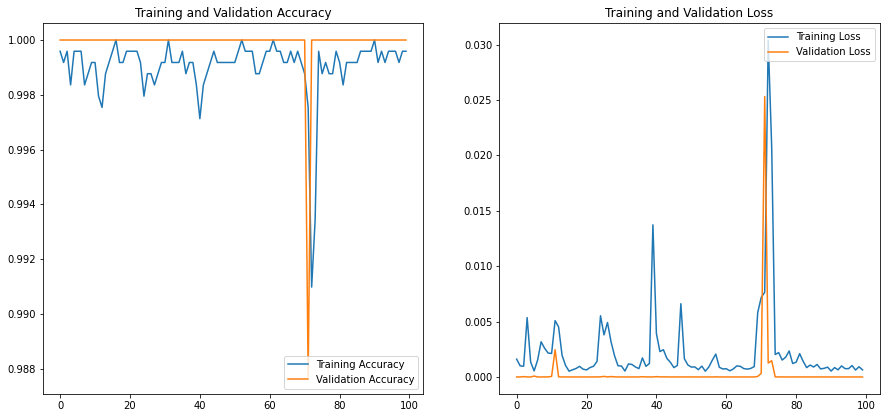

In [ ]:
##-----------------sklearn------------##
acc_per_fold=[]
loss_per_fold=[]

X = x_train
y = y_train
kf = KFold(n_splits=10,shuffle=True)
#print(kf.get_n_splits(X))
#print(kf)
#print(X.shape)
#print(y.shape)
#KFold(n_splits=2, random_state=None, shuffle=False)
fold_no = 1
for train_index, test_index in kf.split(X):

  #print("TRAIN:", train_index, "TEST:", test_index)
  X_train_kf, X_val_kf = X[train_index], X[test_index]
  y_train_kf, y_val_kf = y[train_index], y[test_index]

  opt = Adam(learning_rate=0.0001)
  model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) , metrics = ['accuracy'])
  
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  history = model.fit(x_train,y_train,epochs = 100,batch_size=64 , validation_data = (X_val_kf, y_val_kf))
  

  scores = model.evaluate(X_val_kf,y_val_kf , verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
  model.save("model"+str(fold_no)+".h5")

  #loss accuracy graph
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(100)

  plt.figure(figsize=(15, 15))
  plt.subplot(2, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()


  #clear session
  tf.keras.backend.clear_session()
  #gc.collect()

  fold_no = fold_no + 1